In [55]:
import numpy as np
import sys
import pandas as pd
import seaborn as sns
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Ellipse
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

In [56]:
url = True
if url:
    data = pd.read_csv("https://raw.githubusercontent.com/ndViet27/KPDL_Nhom3_Clustering1/refs/heads/main/diabetes.csv")
else:
    data = pd.read_csv("diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [57]:
X = data.iloc[:, 0:8].values
print(X)
# Chuẩn hoá dữ liệu
std = MinMaxScaler()
X_std = std.fit_transform(X)
print(X_std[:10])

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]
 [0.29411765 0.58291457 0.60655738 0.         0.         0.38152012
  0.05251921 0.15      ]
 [0.17647059 0.3919598  0.40983607 0.32323232 0.10401891 0.46199702
  0.07258753 0.08333333]
 [0.58823529 

In [58]:
gm = GaussianMixture(n_components=9,
                     covariance_type='full',
                     random_state=0).fit(X_std)
print('means: \n', gm.means_)
print('covariances: \n ', gm.covariances_)

means: 
 [[8.53385931e-02 5.22295779e-01 5.46071768e-01 2.62847797e-01
  1.15001611e-01 4.63166842e-01 1.42970237e-01 4.55205289e-02]
 [5.65318162e-02 5.98698612e-01 5.82305058e-01 3.40584059e-01
  1.93271427e-01 5.43709613e-01 3.65061815e-01 9.83121013e-02]
 [2.47564212e-01 5.66978415e-01 6.05981401e-01 2.93785592e-01
  1.05267286e-72 4.84383189e-01 1.49366928e-01 2.12479018e-01]
 [2.84471699e-01 6.24539825e-01 6.11815420e-01 0.00000000e+00
  0.00000000e+00 4.60718968e-01 1.37174172e-01 2.92914484e-01]
 [4.08828378e-01 7.59224190e-01 6.40286091e-01 3.41417862e-01
  3.32403982e-01 5.11793776e-01 2.04169646e-01 5.19531649e-01]
 [1.67579391e-01 8.13532674e-01 5.99846832e-01 3.44838846e-01
  3.91685458e-01 5.41279590e-01 2.17200316e-01 1.07031711e-01]
 [2.16263055e-01 5.91782478e-01 0.00000000e+00 1.57456747e-02
  0.00000000e+00 3.85771864e-01 1.26977873e-01 1.41666626e-01]
 [3.88001839e-01 6.13318936e-01 5.92687768e-01 3.07531125e-01
  1.42631066e-01 4.83334496e-01 1.96581374e-01 2.76803

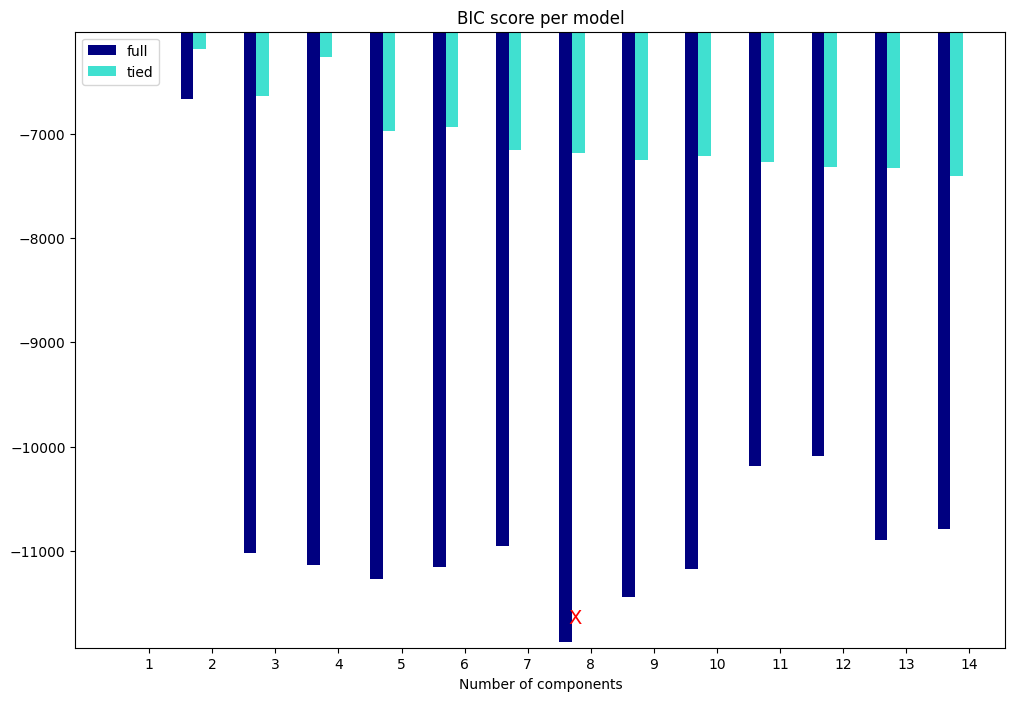

In [66]:
lowest_bic = np.inf
bic = []
n_components_range = range(1,15)
# cv_types = ['spherical', 'tied', 'diag', 'full']
cv_types = ['full', 'tied']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit Gaussian mixture theo phương pháp huấn luyện EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_std)


        bic.append(gmm.bic(X_std))
        # Gán model có BIC scores thấp nhất là model tốt nhất
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm


bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise'])
clf = best_gmm
bars = []


# Vẽ biểu đồ BIC scores
plt.figure(figsize=(12, 8))
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.xticks(list(n_components_range))
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), 'X', fontsize=14,color='red')
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)



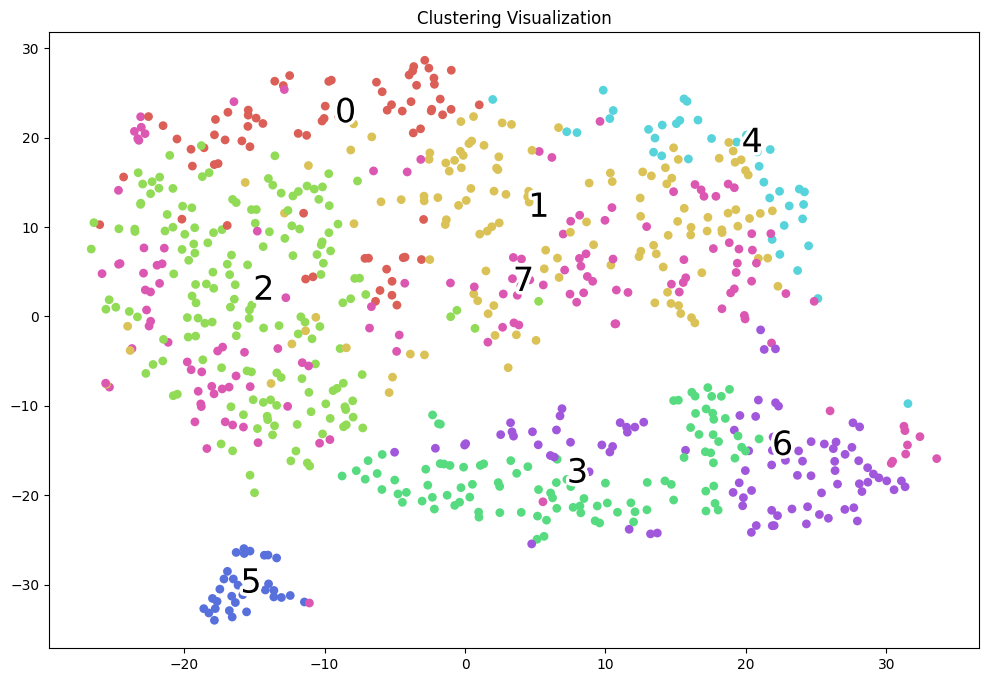

In [67]:
def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
   
    '''
    tsne = TSNE(n_components=2, random_state=42)
    X_2d = tsne.fit_transform(X)
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))


    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X_2d[:,0], X_2d[:,1], lw=0, s=40, c=palette[labels.astype(np.int32)])


    # thêm nhãn cho mỗi cluster
    txts = []


    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X_2d[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('Clustering Visualization')


labels = best_gmm.predict(X_std)
_plot_kmean_scatter(X_std, labels)


In [70]:
data_with_cluster = data.copy()
data_with_cluster['Cluster'] = labels
# data_with_cluster.groupby('Cluster').mean().reset_index()
result = data_with_cluster.groupby('Cluster')['Outcome'].value_counts(normalize=True).mul(100).round(1)
result.unstack(fill_value=0).T

Cluster,0,1,2,3,4,5,6,7
Outcome,,,,,,,,
0,55.6,57.1,89.0,71.3,26.3,53.1,53.2,66.2
1,44.4,42.9,11.0,28.7,73.7,46.9,46.8,33.8
